In [53]:
import spotipy  
from spotipy.oauth2 import SpotifyOAuth  
from requests import post, get
import base64
import os
import json

CLIENT_ID = 'bef7f07afb10490690745f395ee426f4'
CLIENT_SECRET = '7e2569bed6884e26991c2a2c227039f1'

def get_token():
    auth_string = CLIENT_ID + ":" + CLIENT_SECRET
    auth_bytes = auth_string.encode("utf-8")
    auth_base64 = str(base64.b64encode(auth_bytes), "utf-8")
    
    url = "https://accounts.spotify.com/api/token"
    headers = {
        "Authorization": "Basic " + auth_base64,
        "Content-Type": "application/x-www-form-urlencoded"
    }
    data = {"grant_type": "client_credentials"}
    result = post(url, headers = headers, data = data)
    json_result = json.loads(result.content)
    token = json_result["access_token"]
    return token

def get_auth_header(token):
    return{"Authorization": "Bearer " + token}

def search_for_artist(token, artist_name):
    url = "https://api.spotify.com/v1/search"
    headers = get_auth_header(token)
    # limit = 1 returns only one artist
    query = f"?q={artist_name}&type=artist&limit=1"
    query_url = url + query
    result = get(query_url, headers = headers)
    json_result = json.loads(result.content)["artists"]["items"]
    if len(json_result) == 0:
        print(f"{artist_name} does not exist")
        return None
    
    return json_result[0]


def search_for_track(token, track_id):
    url = "https://api.spotify.com/v1/tracks/{track_id}"
    headers = get_auth_header(token)
    # limit = 1 returns only one artist
    query_url = url
    result = get(query_url, headers = headers)
    json_result = json.loads(result.content)
    if len(json_result) == 0:
        print(f"{track_name} does not exist")
        return None
    
    return json_result


    
token = get_token()
result = search_for_track(token, "1FpVJ7HpZInE2GvhVE2TwT")
print(result)

# sp_oauth = SpotifyOAuth(client_id=CLIENT_ID, client_secret=CLIENT_SECRET, redirect_uri='http://localhost:8888/callback', scope='user-read-private user-read-email')  
  
# access_token = sp_oauth.get_access_token()  
# refresh_token = sp_oauth.get_refresh_token()  

{'error': {'status': 400, 'message': 'invalid id'}}


In [278]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Replace 'YOUR_CLIENT_ID' and 'YOUR_CLIENT_SECRET' with your actual credentials
client_id = 'bef7f07afb10490690745f395ee426f4'
client_secret = '7e2569bed6884e26991c2a2c227039f1'

def get_track_features(track_name, artist_name):
    # Set up Spotipy with client credentials
    client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
    sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

    results = sp.search(q=f'track:{track_name} artist:{artist_name}', type='track')
    track_id = results['tracks']['items'][0]['id']

    track_features = sp.audio_features(tracks=[track_id])
    return track_features

get_track_features('DNA', 'Kendrick Lamar')

[{'danceability': 0.638,
  'energy': 0.523,
  'key': 1,
  'loudness': -6.664,
  'mode': 1,
  'speechiness': 0.357,
  'acousticness': 0.00454,
  'instrumentalness': 0,
  'liveness': 0.0842,
  'valence': 0.422,
  'tempo': 139.913,
  'type': 'audio_features',
  'id': '6HZILIRieu8S0iqY8kIKhj',
  'uri': 'spotify:track:6HZILIRieu8S0iqY8kIKhj',
  'track_href': 'https://api.spotify.com/v1/tracks/6HZILIRieu8S0iqY8kIKhj',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6HZILIRieu8S0iqY8kIKhj',
  'duration_ms': 185947,
  'time_signature': 4}]

In [449]:
import pandas as pd
from collections import defaultdict
from tqdm import tqdm

# path to 'big-data.csv', need to have on the same directory as notebook
file_path = '/Users/ryanye/Documents/Yale-NUS/DIS Copenhagen/Modules/Big Data/1971-1980.csv'

# read the file as a pandas dataframe
df = pd.read_csv(file_path)
df
# import re
# # removing content after words "featuring," "feat.," "ft.," and "&" in columns artist and song (case-insensitive)
# df['artist'] = df['artist'].str.replace(r'\s*(featuring|featuring:|feat\.|ft\.|&)\s.*$', "", regex=True, flags=re.IGNORECASE)

# # merging columns with a comme-separation
# merged_column = df['song'] + ', ' + df['artist']

# if not "song, artist" in df.columns:
#     # insert the new column into the dataframe
#     df.insert(4, 'song, artist', merged_column)


,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,27/12/80,1,(Just Like) Starting Over,John Lennon,3.0,1,9
1,27/12/80,2,More Than I Can Say,Leo Sayer,2.0,2,14
2,27/12/80,3,Love On The Rocks,Neil Diamond,4.0,3,9
3,27/12/80,4,Lady,Kenny Rogers,1.0,1,13
4,27/12/80,5,Hungry Heart,Bruce Springsteen,6.0,5,8
...,...,...,...,...,...,...,...
52182,2/1/71,96,Cheryl Moana Marie,John Rowles,NaN,96,1
52183,2/1/71,97,There It Goes Again,Barbara And The Uniques,NaN,97,1
52184,2/1/71,98,You Just Can't Win (By Making The Same Mistake),Gene & Jerry,NaN,98,1
52185,2/1/71,99,Now I'm A Woman,Nancy Wilson,NaN,99,1


In [387]:
# grouping dataframe by unique song, artist pairings and retaining only the rows with maximum values
weeks_on_board = df.groupby(["song, artist"]).max()

# grouping dataframe by unique song, artist pairings and calculating the aggregate mean values
mean_rank = df.groupby(["song, artist"]).mean()

# merging the 2 previous dataframes into a single dataframe, merging on "song, artist"
merge_df_no_duplicates = pd.merge(weeks_on_board, mean_rank, on = "song, artist")

In [388]:
# dropping the unecessary columns
billboard_song_rankings = merge_df_no_duplicates.drop(columns=['peak-rank_y', 'weeks-on-board_y', 
                                                               'rank_x', 'last-week_x', 'peak-rank_x',
                                                               'last-week_y'])
billboard_song_rankings.rename(columns={'weeks-on-board_x': 'weeks_on_board', 'rank_y': 'mean_rank'}, inplace=True)
# Calculating the popularity scores
billboard_song_rankings['popularity_score'] = (1 / billboard_song_rankings["mean_rank"]) * billboard_song_rankings["weeks_on_board"]
# Filtering only the top 1000 most popular songs per decade (so as not to exceed the rate-limit in the Spotify
# API calls)
billboard_song_rankings_seventies = billboard_song_rankings.nlargest(1500, 'popularity_score')
billboard_song_rankings_seventies['song_artist'] = billboard_song_rankings_seventies['song'] + ', ' + billboard_song_rankings_seventies['artist']

In [389]:
billboard_song_rankings_seventies

,date,song,artist,weeks_on_board,mean_rank,popularity_score,song_artist
"song, artist",,,,,,,
"Knock Three Times, Dawn",9/1/71,Knock Three Times,Dawn,18,7.166667,2.511628,"Knock Three Times, Dawn"
"My Sweet Lord/Isn't It A Pity, George Harrison",9/1/71,My Sweet Lord/Isn't It A Pity,George Harrison,14,7.555556,1.852941,"My Sweet Lord/Isn't It A Pity, George Harrison"
"One Less Bell To Answer, The 5th Dimension",9/1/71,One Less Bell To Answer,The 5th Dimension,19,10.555556,1.800000,"One Less Bell To Answer, The 5th Dimension"
"Groove Me, King Floyd",9/1/71,Groove Me,King Floyd,20,11.200000,1.785714,"Groove Me, King Floyd"
"Lady, Kenny Rogers",8/11/80,Lady,Kenny Rogers,13,7.538462,1.724490,"Lady, Kenny Rogers"
...,...,...,...,...,...,...,...
"When I Wanted You, Barry Manilow",9/2/80,When I Wanted You,Barry Manilow,16,50.937500,0.314110,"When I Wanted You, Barry Manilow"
"Why Not Me, Fred Knoblock",9/8/80,Why Not Me,Fred Knoblock,14,44.571429,0.314103,"Why Not Me, Fred Knoblock"
"Harry Truman, Chicago",8/3/75,Harry Truman,Chicago,9,28.666667,0.313953,"Harry Truman, Chicago"


In [391]:
import pandas as pd
import numpy as np

# initiating empty dictionary
data_seventies = {}

data_seventies['date'] = np.array([])
data_seventies['song, artist'] = np.array([])
data_seventies['song'] = np.array([])
data_seventies['artist'] = np.array([])
data_seventies['danceability'] = np.array([])
data_seventies['energy'] = np.array([])
data_seventies['key'] = np.array([])
data_seventies['loudness'] = np.array([])
data_seventies['mode'] = np.array([])
data_seventies['speechiness'] = np.array([])
data_seventies['acousticness'] = np.array([])
data_seventies['instrumentalness'] = np.array([])
data_seventies['liveness'] = np.array([])
data_seventies['valence'] = np.array([])
data_seventies['tempo'] = np.array([])
data_seventies['duration_ms'] = np.array([])


# Finding song features and appending them to the dictionary. Key: Feature. Value: Value of Features 
for index, row in tqdm(billboard_song_rankings_seventies.iterrows()):
    try:
        song_features = get_track_features(row['song'], row['artist'])
        # Appending danceability feature 
        data_seventies['danceability'] = np.append(data_seventies['danceability'], song_features[0]['danceability'])
        
        data_seventies['song, artist'] = np.append(data_seventies['song, artist'], index)
        data_seventies['song'] = np.append(data_seventies['song'], row['song'])
        data_seventies['artist'] = np.append(data_seventies['artist'], row['artist'])
        data_seventies['date'] = np.append(data_seventies['date'], row['date'])
        # Appending energy feature 
        data_seventies['energy'] = np.append(data_seventies['energy'], song_features[0]['energy'])

        # Appending key feature 
        data_seventies['key'] = np.append(data_seventies['key'], song_features[0]['key'])

        # Appending loudness feature 
        data_seventies['loudness'] = np.append(data_seventies['loudness'], song_features[0]['loudness'])

        # Appending mode feature 
        data_seventies['mode'] = np.append(data_seventies['mode'], song_features[0]['mode'])

        # Appending speechiness feature 
        data_seventies['speechiness'] = np.append(data_seventies['speechiness'], song_features[0]['speechiness'])

        # Appending acousticness feature 
        data_seventies['acousticness'] = np.append(data_seventies['acousticness'], song_features[0]['acousticness'])

        # Appending instrumentalness feature 
        data_seventies['instrumentalness'] = np.append(data_seventies['instrumentalness'], song_features[0]['instrumentalness'])

        # Appending liveness feature
        data_seventies['liveness'] = np.append(data_seventies['liveness'], song_features[0]['liveness'])

        # Appending valence feature 
        data_seventies['valence'] = np.append(data_seventies['valence'], song_features[0]['valence'])

        # Appending tempo feature 
        data_seventies['tempo'] = np.append(data_seventies['tempo'], song_features[0]['tempo'])

        # Appending duration_ms feature 
        data_seventies['duration_ms'] = np.append(data_seventies['duration_ms'], song_features[0]['duration_ms'])
        
    except (IndexError, TypeError) as e:
        print(f"Error at index {row['song']}: {e}")
        continue  # Skip to the next iteration when an error occurs
    
seventies_features_df = pd.DataFrame(data_seventies)

2it [00:02,  1.04it/s]

Error at index My Sweet Lord/Isn't It A Pity: list index out of range


9it [00:05,  1.95it/s]

Error at index I Think I Love You: list index out of range


18it [00:10,  2.13it/s]

Error at index American Pie (Parts I & II): list index out of range


29it [00:16,  2.15it/s]

Error at index It's Too Late/I Feel The Earth Move: list index out of range


56it [00:31,  2.10it/s]

Error at index Keep On Truckin' (Part 1): list index out of range


65it [00:36,  1.90it/s]

Error at index Another Brick In The Wall (Part II): list index out of range


66it [00:37,  2.07it/s]

Error at index Philadelphia Freedom: list index out of range


70it [00:39,  1.88it/s]

Error at index Evergreen (Love Theme From "A Star Is Born"): list index out of range


76it [00:42,  1.95it/s]

Error at index I'll Take You There: list index out of range


78it [00:43,  2.19it/s]

Error at index Imagine: list index out of range


83it [00:46,  1.78it/s]

Error at index I'm Sorry: list index out of range


84it [00:47,  1.89it/s]

Error at index Can't Smile Without You: list index out of range


86it [00:48,  2.08it/s]

Error at index Coming Up (Live At Glasgow): list index out of range


98it [00:55,  1.81it/s]

Error at index I Like Dreamin': list index out of range


99it [00:56,  1.97it/s]

Error at index Don't It Make My Brown Eyes Blue: list index out of range


104it [00:58,  2.07it/s]

Error at index You're The One That I Want: list index out of range


112it [01:03,  1.82it/s]

Error at index Loves Me Like A Rock: list index out of range


170it [01:42,  1.71it/s]

Error at index Maggie May/Reason To Believe: list index out of range


206it [02:06,  1.55it/s]

Error at index I'm Your Boogie Man: list index out of range


220it [02:15,  1.80it/s]

Error at index Disco Duck (Part I): list index out of range


243it [02:31,  1.68it/s]

Error at index Cupid/I've Loved You For A Long Time: list index out of range


249it [02:34,  2.05it/s]

Error at index Don't Go Breaking My Heart: list index out of range


252it [02:36,  1.88it/s]

Error at index Bridge Over Troubled Water/Brand New Me: list index out of range


255it [02:37,  1.66it/s]

Error at index Nadia's Theme (The Young And The Restless): list index out of range


259it [02:40,  1.68it/s]

Error at index Yes, I'm Ready: list index out of range


260it [02:41,  1.85it/s]

Error at index I'm Still In Love With You: list index out of range


274it [02:50,  1.79it/s]

Error at index The Candy Man: list index out of range


280it [02:54,  1.66it/s]

Error at index You're In My Heart (The Final Acclaim): list index out of range


282it [02:55,  1.83it/s]

Error at index Don't Fall In Love With A Dreamer: list index out of range


284it [02:56,  1.92it/s]

Error at index You're The First, The Last, My Everything: list index out of range


285it [02:56,  2.11it/s]

Error at index Then Came You: list index out of range


289it [02:59,  1.84it/s]

Error at index Doesn't Somebody Want To Be Wanted: list index out of range


295it [03:03,  1.34it/s]

Error at index I've Got To Use My Imagination: list index out of range


303it [03:09,  1.71it/s]

Error at index Don't Give Up On Us: list index out of range


310it [03:13,  1.58it/s]

Error at index Heartbeat - It's A Lovebeat: list index out of range


321it [03:21,  1.55it/s]

Error at index We're An American Band: list index out of range


328it [03:26,  1.53it/s]

Error at index You'll Never Find Another Love Like Mine: list index out of range


336it [03:31,  1.87it/s]

Error at index Pick Up The Pieces: list index out of range


348it [03:38,  1.61it/s]

Error at index Rockin' Pneumonia - Boogie Woogie Flu: list index out of range


353it [03:41,  1.67it/s]

Error at index Swayin' To The Music (slow Dancin'): list index out of range


356it [03:43,  1.72it/s]

Error at index Dueling Banjos: list index out of range


370it [03:52,  1.72it/s]

Error at index Beth/Detroit Rock City: list index out of range


386it [04:01,  1.97it/s]

Error at index You Ain't Seen Nothing Yet/Free Wheelin': list index out of range


415it [04:19,  1.73it/s]

Error at index (You're) Having My Baby: list index out of range


448it [04:40,  1.77it/s]

Error at index I'm Coming Out: list index out of range


470it [04:54,  1.64it/s]

Error at index Another Day/Oh Woman Oh Why: list index out of range


474it [04:56,  1.93it/s]

Error at index I've Got Love On My Mind: list index out of range


477it [04:58,  1.86it/s]

Error at index Pillow Talk: list index out of range


478it [04:58,  2.10it/s]

Error at index (Every Time I Turn Around) Back In Love Again: list index out of range


482it [05:01,  1.90it/s]

Error at index Desire: list index out of range


487it [05:04,  1.72it/s]

Error at index Don't Cry Out Loud: list index out of range


489it [05:05,  1.79it/s]

Error at index Junior's Farm/Sally G: list index out of range


493it [05:08,  1.69it/s]

Error at index I'm In You: list index out of range


496it [05:10,  1.77it/s]

Error at index Couldn't Get It Right: list index out of range


500it [05:12,  1.93it/s]

Error at index Pay To The Piper: list index out of range


510it [05:18,  1.46it/s]

Error at index I'm Not Lisa: list index out of range


528it [05:30,  1.60it/s]

Error at index Superstar: list index out of range


531it [05:32,  1.87it/s]

Error at index We're All Alone: list index out of range


538it [05:36,  1.68it/s]

Error at index Superstar/Bless The Beasts And Children: list index out of range


545it [05:40,  1.78it/s]

Error at index You've Lost That Lovin' Feeling: list index out of range


549it [05:43,  1.78it/s]

Error at index You're Only Lonely: list index out of range


551it [05:44,  1.78it/s]

Error at index Dreaming: list index out of range


554it [05:46,  1.97it/s]

Error at index Don't Bring Me Down: list index out of range


556it [05:46,  2.12it/s]

Error at index I'm Not In Love: list index out of range


561it [05:49,  2.07it/s]

Error at index We Gotta Get You A Woman: list index out of range


570it [05:55,  1.75it/s]

Error at index I'll Be Good To You: list index out of range


572it [05:56,  1.84it/s]

Error at index Heat Wave/love Is A Rose: list index out of range


575it [05:58,  1.80it/s]

Error at index I'm Gonna Love You Just A Little More Baby: list index out of range


580it [06:01,  1.57it/s]

Error at index River Deep - Mountain High: list index out of range


582it [06:03,  1.45it/s]

Error at index I'm Alright: list index out of range


588it [06:07,  1.67it/s]

Error at index Ain't No Woman (Like The One I've Got): list index out of range


637it [06:39,  1.66it/s]

Error at index Heaven Knows: list index out of range


642it [06:42,  1.57it/s]

Error at index Don't Stop 'til You Get Enough: list index out of range


644it [06:44,  1.43it/s]

Error at index I'll Be There: list index out of range


646it [06:45,  1.61it/s]

Error at index Don't Pull Your Love: list index out of range


687it [07:14,  1.54it/s]

Error at index Sweet And Innocent: list index out of range


732it [07:46,  1.57it/s]

Error at index Don't Do Me Like That: list index out of range


740it [07:51,  1.68it/s]

Error at index Brass In Pocket (I'm Special): list index out of range


743it [07:52,  1.78it/s]

Error at index You're My World: list index out of range


751it [07:58,  1.68it/s]

Error at index Beginnings/Colour My World: list index out of range


760it [08:04,  1.43it/s]

Error at index Don't Look Back: list index out of range


764it [08:07,  1.69it/s]

Error at index Garden Party: list index out of range


776it [08:15,  1.53it/s]

Error at index Smoke From A Distant Fire: list index out of range


782it [08:19,  1.68it/s]

Error at index (i've Been) Searchin' So Long: list index out of range


788it [08:22,  1.61it/s]

Error at index Cut The Cake: list index out of range


800it [08:31,  1.38it/s]

Error at index I'm Leaving It (All) Up To You: list index out of range


804it [08:34,  1.56it/s]

Error at index Help Me: list index out of range


807it [08:36,  1.64it/s]

Error at index I Don't Like To Sleep Alone: list index out of range


808it [08:36,  1.55it/s]

Error at index I'd Like To Teach The World To Sing (In Perfect Harmony): list index out of range


825it [08:48,  1.54it/s]

Error at index I'm Doin' Fine Now: list index out of range


828it [08:50,  1.71it/s]

Error at index Stick-Up: list index out of range


831it [08:52,  1.79it/s]

Error at index Whatever Gets You Thru The Night: list index out of range


835it [08:54,  1.65it/s]

Error at index One Man Woman/One Woman Man: list index out of range


849it [09:03,  1.62it/s]

Error at index Freddie's Dead (Theme From "Superfly"): list index out of range


856it [09:08,  1.82it/s]

Error at index Ain't No Stoppin' Us Now: list index out of range


860it [09:10,  1.80it/s]

Error at index That'll Be The Day: list index out of range


864it [09:13,  1.71it/s]

Error at index Shake It: list index out of range


870it [09:17,  1.60it/s]

Error at index You're No Good: list index out of range


873it [09:18,  1.81it/s]

Error at index No No Song/snookeroo: list index out of range


875it [09:19,  1.94it/s]

Error at index Dynomite-Part I: list index out of range


876it [09:20,  2.09it/s]

Error at index I'm Easy: list index out of range


878it [09:21,  1.96it/s]

Error at index Don't Let Go: list index out of range


885it [09:26,  1.50it/s]

Error at index Baby Face: list index out of range


890it [09:30,  1.46it/s]

Error at index I've Found Someone Of My Own: list index out of range


903it [09:39,  1.53it/s]

Error at index Have You Ever Seen The Rain/Hey Tonight: list index out of range


904it [09:39,  1.68it/s]

Error at index Hey Girl/I Knew You When: list index out of range


916it [09:47,  1.73it/s]

Error at index Promises: list index out of range


921it [09:51,  1.65it/s]

Error at index Xanadu: list index out of range


922it [09:51,  1.73it/s]

Error at index You Are So Beautiful/It's A Sin When You Love Somebody: list index out of range


927it [09:54,  1.80it/s]

Error at index Easy Loving: list index out of range


934it [09:59,  1.53it/s]

Error at index An American Dream: list index out of range


936it [10:00,  1.69it/s]

Error at index I've Got The Music In Me: list index out of range


937it [10:00,  1.92it/s]

Error at index I Woke Up In Love This Morning: list index out of range


943it [10:04,  1.50it/s]

Error at index Don't Let The Sun Go Down On Me: list index out of range


948it [10:08,  1.51it/s]

Error at index Don't Call Us, We'll Call You: list index out of range


954it [10:11,  1.87it/s]

Error at index Isn't It Time: list index out of range


982it [10:30,  1.46it/s]

Error at index Can't Get It Out Of My Head: list index out of range


987it [10:34,  1.39it/s]

Error at index Can't Get Enough Of Your Love, Babe: list index out of range


1000it [10:43,  1.42it/s]

Error at index You're A Special Part Of Me: list index out of range


1003it [10:45,  1.44it/s]

Error at index Who'd She Coo?: list index out of range


1010it [10:49,  1.75it/s]

Error at index Americans: list index out of range


1017it [10:54,  1.81it/s]

Error at index Don't Let Me Be Misunderstood: list index out of range


1021it [10:56,  1.56it/s]

Error at index I Am...I Said/Done Too Soon: list index out of range


1022it [10:57,  1.72it/s]

Error at index Love's Grown Deep: list index out of range


1028it [11:01,  1.54it/s]

Error at index Ain't No Way To Treat A Lady: list index out of range


1042it [11:11,  1.61it/s]

Error at index Whispering/Cherchez La Femme/Se Si Bon: list index out of range


1054it [11:19,  1.57it/s]

Error at index Jambalaya (On The Bayou): list index out of range


1059it [11:22,  1.65it/s]

Error at index Black Superman - "Muhammad Ali": list index out of range


1061it [11:24,  1.57it/s]

Error at index Vincent (Starry, Starry Night)/Castles In The Air: list index out of range


1063it [11:25,  1.63it/s]

Error at index Ain't Gonna Bump No More (with No Big Fat Woman): list index out of range


1071it [11:30,  1.75it/s]

Error at index You're The Only Woman (You & I): list index out of range


1073it [11:31,  1.72it/s]

Error at index Should've Never Let You Go: list index out of range


1080it [11:36,  1.35it/s]

Error at index Supernatural Thing - Part I: list index out of range


1083it [11:38,  1.60it/s]

Error at index We've Got Tonight: list index out of range


1093it [11:45,  1.84it/s]

Error at index I'd Like To Teach The World To Sing (In Perfect Harmony): list index out of range


1097it [11:47,  1.62it/s]

Error at index Don't You Worry 'Bout A Thing: list index out of range


1111it [11:57,  1.79it/s]

Error at index Don't Say You Don't Remember: list index out of range


1133it [12:12,  1.58it/s]

Error at index Don't Let Me Be Lonely Tonight: list index out of range


1149it [12:23,  1.58it/s]

Error at index I'm Just A Singer (In A Rock And Roll Band): list index out of range


1154it [12:26,  1.71it/s]

Error at index I'll Meet You Halfway: list index out of range


1155it [12:26,  1.80it/s]

Error at index Don't Worry Baby: list index out of range


1161it [12:30,  1.62it/s]

Error at index I Feel A Song (In My Heart)/Don't Burn Down The Bridge: list index out of range


1166it [12:34,  1.36it/s]

Error at index Funky Nassau-Part I: list index out of range


1170it [12:36,  1.74it/s]

Error at index You'll Accomp'ny Me: list index out of range


1201it [12:57,  1.71it/s]

Error at index I'm On Fire: list index out of range


1212it [13:03,  1.90it/s]

Error at index Don't Knock My Love - Pt. 1: list index out of range


1221it [13:09,  1.62it/s]

Error at index I'll Play For You: list index out of range


1225it [13:11,  1.78it/s]

Error at index Don't Hold Back: list index out of range


1233it [13:17,  1.38it/s]

Error at index All Night Long: list index out of range


1237it [13:19,  1.69it/s]

Error at index Mighty Love - Pt. 1: list index out of range


1241it [13:22,  1.67it/s]

Error at index Uptown Festival (Part 1): list index out of range


1250it [13:28,  1.58it/s]

Error at index So Far Away/Smackwater Jack: list index out of range


1263it [13:37,  1.76it/s]

Error at index Livin' It Up (Friday Night): list index out of range


1298it [14:01,  1.99it/s]

Error at index One Monkey Don't Stop No Show Part I: list index out of range


1300it [14:02,  2.02it/s]

Error at index Rainbow Connection: list index out of range


1306it [14:06,  1.44it/s]

Error at index Why/Lonely Boy: list index out of range


1308it [14:08,  1.53it/s]

Error at index Ain't Understanding Mellow: list index out of range


1310it [14:09,  1.42it/s]

Error at index The White Knight: list index out of range


1324it [14:18,  1.92it/s]

Error at index Can't Stop Dancin': list index out of range


1327it [14:20,  1.85it/s]

Error at index My Sweet Lady: list index out of range


1339it [14:29,  1.67it/s]

Error at index D'yer Mak'er: list index out of range


1344it [14:32,  1.78it/s]

Error at index Burning Bridges: list index out of range


1357it [14:40,  1.80it/s]

Error at index (Do The) Push And Pull Part I: list index out of range


1359it [14:41,  1.94it/s]

Error at index Don't Ask Me Why: list index out of range


1365it [14:45,  1.84it/s]

Error at index Get On The Good Foot-Part 1: list index out of range


1368it [14:47,  1.83it/s]

Error at index Baby Let Me Take You (In My Arms): list index out of range


1383it [14:56,  1.86it/s]

Error at index I Really Don't Want To Know/There Goes My Everything: list index out of range


1387it [14:59,  1.63it/s]

Error at index I've Been Lonely For So Long: list index out of range


1401it [15:08,  1.63it/s]

Error at index I'm Alive: list index out of range


1404it [15:10,  1.77it/s]

Error at index Make A Little Magic: list index out of range


1406it [15:11,  1.78it/s]

Error at index For The Love Of You (Part 1&2): list index out of range


1413it [15:15,  1.86it/s]

Error at index I'm A Woman: list index out of range


1416it [15:17,  1.87it/s]

Error at index Feeling Alright: list index out of range


1419it [15:18,  2.14it/s]

Error at index Earache My Eye: list index out of range


1426it [15:22,  2.14it/s]

Error at index You're The Love: list index out of range


1442it [15:33,  1.50it/s]

Error at index I Am Love (Parts I & II): list index out of range


1444it [15:34,  1.71it/s]

Error at index Oh! Darling: list index out of range


1446it [15:36,  1.44it/s]

Error at index Ain't Nothing Like The Real Thing: list index out of range


1452it [15:40,  1.64it/s]

Error at index To The Door Of The Sun (Alle Porte Del Sole): list index out of range


1457it [15:43,  1.77it/s]

Error at index Give It What You Got/Peace Pipe: list index out of range


1459it [15:44,  1.88it/s]

Error at index Every Day Of My Life: list index out of range


1462it [15:46,  2.04it/s]

Error at index Steamroller Blues/Fool: list index out of range


1465it [15:47,  1.86it/s]

Error at index I'm In Love: list index out of range


1466it [15:48,  2.05it/s]

Error at index When I Fall In Love/Are You Lonesome Tonight: list index out of range


1467it [15:48,  2.05it/s]

Error at index Don't Want To Live Without It: list index out of range


1478it [15:55,  1.83it/s]

Error at index I'm Not My Brothers Keeper: list index out of range


1480it [15:56,  1.93it/s]

Error at index Disco Lucy (i Love Lucy Theme): list index out of range


1485it [15:59,  1.90it/s]

Error at index Stay/The Load-Out: list index out of range


1492it [16:04,  1.52it/s]

Error at index One Tin Soldier, The Legend of Billy Jack: list index out of range


1497it [16:07,  1.67it/s]

Error at index Why Not Me: list index out of range


1499it [16:08,  1.78it/s]

Error at index Basketball Jones Featuring Tyrone Shoelaces: list index out of range


1500it [16:09,  1.55it/s]


In [400]:
dataset_seventies_features_df = seventies_features_df
dataset_seventies_features_df = pd.merge(dataset_seventies_features_df, billboard_song_rankings_seventies['popularity_score'], on = "song, artist")
dataset_seventies_features_df.shape

(1309, 17)

In [401]:
dataset_seventies_features_df

,date,"song, artist",song,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity_score
0,9/1/71,"Knock Three Times, Dawn",Knock Three Times,Dawn,0.774,0.580,1.0,-10.080,1.0,0.0512,0.1580,0.000000,0.0458,0.923,123.127,176704.0,2.511628
1,9/1/71,"One Less Bell To Answer, The 5th Dimension",One Less Bell To Answer,The 5th Dimension,0.398,0.405,11.0,-6.664,0.0,0.0258,0.7370,0.000050,0.1310,0.443,99.694,210760.0,1.800000
2,9/1/71,"Groove Me, King Floyd",Groove Me,King Floyd,0.908,0.421,11.0,-9.382,1.0,0.0648,0.2600,0.000650,0.0805,0.861,102.977,183267.0,1.785714
3,8/11/80,"Lady, Kenny Rogers",Lady,Kenny Rogers,0.362,0.183,3.0,-16.000,0.0,0.0347,0.8610,0.000234,0.0932,0.200,136.646,231867.0,1.724490
4,8/11/80,"Another One Bites The Dust, Queen",Another One Bites The Dust,Queen,0.933,0.528,5.0,-6.472,0.0,0.1620,0.1120,0.329000,0.1630,0.756,109.975,214653.0,1.716738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,9/9/78,"Two Tickets To Paradise, Eddie Money",Two Tickets To Paradise,Eddie Money,0.623,0.680,2.0,-13.255,1.0,0.0282,0.0056,0.000425,0.1480,0.737,129.713,237093.0,0.314607
1305,8/9/73,"How Can I Tell Her, Lobo",How Can I Tell Her,Lobo,0.506,0.279,2.0,-13.048,1.0,0.0249,0.6130,0.006040,0.0764,0.449,81.651,260467.0,0.314410
1306,9/2/80,"When I Wanted You, Barry Manilow",When I Wanted You,Barry Manilow,0.308,0.440,1.0,-6.071,1.0,0.0310,0.7710,0.000000,0.0524,0.353,114.771,215587.0,0.314110
1307,8/3/75,"Harry Truman, Chicago",Harry Truman,Chicago,0.478,0.638,2.0,-8.031,1.0,0.0246,0.0273,0.000527,0.7120,0.641,93.708,183053.0,0.313953


In [402]:
dataset_seventies_features_df.to_csv('1971-1980_scraped.csv', index=False)

In [350]:
import pandas as pd
from collections import defaultdict
from tqdm import tqdm
import re

# read the file as a pandas dataframe
df_new = pd.read_csv('/Users/ryanye/Documents/Yale-NUS/DIS Copenhagen/Modules/Big Data/1981-1990.csv')
# removing content after words "featuring," "feat.," "ft.," and "&" in columns artist and song (case-insensitive)
df_new['artist'] = df_new['artist'].str.replace(r'\s*(featuring|featuring:|feat\.|ft\.|&)\s.*$', "", regex=True, flags=re.IGNORECASE)

# merging columns with a comme-separation
merged_column = df_new['song'] + ', ' + df_new['artist']

if not "song, artist" in df_new.columns:
    # insert the new column into the dataframe
    df_new.insert(4, 'song, artist', merged_column)

# grouping dataframe by unique song, artist pairings and retaining only the rows with maximum values
weeks_on_board = df_new.groupby(["song, artist"]).max()
# grouping dataframe by unique song, artist pairings and calculating the aggregate mean values
mean_rank = df_new.groupby(["song, artist"]).mean()
# merging the 2 previous dataframes into a single dataframe, merging on "song, artist"
merge_df_no_duplicates = pd.merge(weeks_on_board, mean_rank, on = "song, artist")
# dropping the unecessary columns
billboard_song_rankings = merge_df_no_duplicates.drop(columns=['peak-rank_y', 'weeks-on-board_y', 
                                                               'rank_x', 'last-week_x', 'peak-rank_x',
                                                               'last-week_y'])
billboard_song_rankings.rename(columns={'weeks-on-board_x': 'weeks_on_board', 'rank_y': 'mean_rank'}, inplace=True)
# Calculating the popularity scores
billboard_song_rankings['popularity_score'] = (1 / billboard_song_rankings["mean_rank"]) * billboard_song_rankings["weeks_on_board"]
# Filtering only the top 1000 most popular songs per decade (so as not to exceed the rate-limit in the Spotify
# API calls)
billboard_song_rankings_eighties = billboard_song_rankings.nlargest(1500, 'popularity_score')
billboard_song_rankings_eighties['song_artist'] = billboard_song_rankings_eighties['song'] + ', ' + billboard_song_rankings_eighties['artist']

In [351]:
billboard_song_rankings_eighties

,date,song,artist,weeks_on_board,mean_rank,popularity_score,song_artist
"song, artist",,,,,,,
"Every Breath You Take, The Police",9/7/83,Every Breath You Take,The Police,22,15.772727,1.394813,"Every Breath You Take, The Police"
"Physical, Olivia Newton-John",9/1/82,Physical,Olivia Newton-John,26,18.961538,1.371197,"Physical, Olivia Newton-John"
"Waiting For A Girl Like You, Foreigner",9/1/82,Waiting For A Girl Like You,Foreigner,23,18.000000,1.277778,"Waiting For A Girl Like You, Foreigner"
"Celebration, Kool",9/5/81,Celebration,Kool,30,23.600000,1.271186,"Celebration, Kool"
"Flashdance...What A Feeling, Irene Cara",9/7/83,Flashdance...What A Feeling,Irene Cara,25,20.000000,1.250000,"Flashdance...What A Feeling, Irene Cara"
...,...,...,...,...,...,...,...
"Bop 'til You Drop, Rick Springfield",8/9/84,Bop 'til You Drop,Rick Springfield,15,44.600000,0.336323,"Bop 'til You Drop, Rick Springfield"
"Girl Can't Help It, Journey",8/11/86,Girl Can't Help It,Journey,14,41.642857,0.336192,"Girl Can't Help It, Journey"
"You Can't Deny It, Lisa Stansfield",9/6/90,You Can't Deny It,Lisa Stansfield,14,41.642857,0.336192,"You Can't Deny It, Lisa Stansfield"


In [316]:
import pandas as pd
import numpy as np

# initiating empty dictionary
# data = {}

# data['date'] = np.array([])
# data['song, artist'] = np.array([])
# data['song'] = np.array([])
# data['artist'] = np.array([])
# data['danceability'] = np.array([])
# data['energy'] = np.array([])
# data['key'] = np.array([])
# data['loudness'] = np.array([])
# data['mode'] = np.array([])
# data['speechiness'] = np.array([])
# data['acousticness'] = np.array([])
# data['instrumentalness'] = np.array([])
# data['liveness'] = np.array([])
# data['valence'] = np.array([])
# data['tempo'] = np.array([])
# data['duration_ms'] = np.array([])


# Finding song features and appending them to the dictionary. Key: Feature. Value: Value of Features 
for index, row in tqdm(billboard_song_rankings.iloc[620:].iterrows()):
    try:
        song_features = get_track_features(row['song'], row['artist'])
        # Appending danceability feature 
        data['danceability'] = np.append(data['danceability'], song_features[0]['danceability'])
        
        data['song, artist'] = np.append(data['song, artist'], index)
        data['song'] = np.append(data['song'], row['song'])
        data['artist'] = np.append(data['artist'], row['artist'])
        data['date'] = np.append(data['date'], row['date'])
        # Appending energy feature 
        data['energy'] = np.append(data['energy'], song_features[0]['energy'])

        # Appending key feature 
        data['key'] = np.append(data['key'], song_features[0]['key'])

        # Appending loudness feature 
        data['loudness'] = np.append(data['loudness'], song_features[0]['loudness'])

        # Appending mode feature 
        data['mode'] = np.append(data['mode'], song_features[0]['mode'])

        # Appending speechiness feature 
        data['speechiness'] = np.append(data['speechiness'], song_features[0]['speechiness'])

        # Appending acousticness feature 
        data['acousticness'] = np.append(data['acousticness'], song_features[0]['acousticness'])

        # Appending instrumentalness feature 
        data['instrumentalness'] = np.append(data['instrumentalness'], song_features[0]['instrumentalness'])

        # Appending liveness feature
        data['liveness'] = np.append(data['liveness'], song_features[0]['liveness'])

        # Appending valence feature 
        data['valence'] = np.append(data['valence'], song_features[0]['valence'])

        # Appending tempo feature 
        data['tempo'] = np.append(data['tempo'], song_features[0]['tempo'])

        # Appending duration_ms feature 
        data['duration_ms'] = np.append(data['duration_ms'], song_features[0]['duration_ms'])
        
    except (IndexError, TypeError) as e:
        print(f"Error at index {row['song']}: {e}")
        continue  # Skip to the next iteration when an error occurs
    
eighties_features_df = pd.DataFrame(data)

11it [00:04,  2.87it/s]

Error at index King Of Wishful Thinking (From "Pretty Woman"): list index out of range


26it [00:09,  3.17it/s]

Error at index I've Done Everything For You: list index out of range


29it [00:10,  3.27it/s]

Error at index Don't Mean Nothing: list index out of range


30it [00:10,  3.52it/s]

Error at index To All The Girls I've Loved Before: list index out of range


33it [00:11,  3.66it/s]

Error at index Sweet Freedom (Theme From "Running Scared"): list index out of range


34it [00:11,  3.84it/s]

Error at index Don't Be Cruel: list index out of range


41it [00:14,  3.22it/s]

Error at index Batdance (From "Batman"): list index out of range


45it [00:15,  3.88it/s]

Error at index I Can't Stand It: list index out of range
Error at index Me So Horny: list index out of range


55it [00:19,  3.16it/s]

Error at index Tarzan Boy (From "Teenage Mutant Ninja Turtles III"): list index out of range


57it [00:19,  3.54it/s]

Error at index Thinking Of You: list index out of range


61it [00:21,  3.01it/s]

Error at index Can't Stay Away From You: list index out of range


90it [00:32,  3.00it/s]

Error at index Who's Johnny ("Short Circuit" Theme): list index out of range


124it [00:44,  3.09it/s]

Error at index The Breakup Song (They Don't Write 'Em): list index out of range


141it [00:50,  3.41it/s]

Error at index Don't Be Cruel: list index out of range
Error at index Girls Nite Out: list index out of range


144it [00:51,  3.39it/s]

Error at index Love Touch (Theme From "Legal Eagles"): list index out of range


151it [00:53,  3.44it/s]

Error at index Silent Running (On Dangerous Ground): list index out of range


153it [00:54,  3.40it/s]

Error at index Don't Stop Believin': list index out of range


159it [00:56,  3.25it/s]

Error at index Almost Paradise...Love Theme From Footloose: list index out of range


184it [01:06,  2.49it/s]

Error at index After All (Love Theme From "Chances Are"): list index out of range


194it [01:09,  2.92it/s]

Error at index In Your Eyes (Theme From "Say Anything"): list index out of range


197it [01:10,  3.17it/s]

Error at index I'm Still Standing: list index out of range


199it [01:11,  3.29it/s]

Error at index I've Been In Love Before: list index out of range


205it [01:13,  3.63it/s]

Error at index Don't You Know What The Night Can Do?: list index out of range


228it [01:20,  4.34it/s]

Error at index I'll Be Over You: list index out of range


238it [01:23,  3.41it/s]

Error at index I'll Tumble 4 Ya: list index out of range


248it [01:26,  3.62it/s]

Error at index Ain't Even Done With The Night: list index out of range


254it [01:28,  3.80it/s]

Error at index Don't Stand So Close To Me: list index out of range


258it [01:29,  3.83it/s]

Error at index I'm On Fire: list index out of range


259it [01:29,  3.81it/s]

Error at index C'mon And Get My Love: list index out of range


262it [01:30,  3.97it/s]

Error at index Cross My Broken Heart (From "Beverly Hills Cop II"): list index out of range


270it [01:33,  3.34it/s]

Error at index Super Freak (Part I): list index out of range


272it [01:33,  3.10it/s]

Error at index Nobody's Fool (Theme From "Caddyshack II"): list index out of range


302it [01:45,  1.99it/s]

Error at index Right On Track: list index out of range
Error at index Whole Wide World (From "True Love"): list index out of range


303it [01:45,  2.26it/s]

Error at index Don't Shut Me Out: list index out of range


340it [01:57,  3.53it/s]

Error at index Parents Just Don't Understand: list index out of range


346it [01:59,  3.08it/s]

Error at index Invincible (Theme From The Legend Of Billie Jean): list index out of range


357it [02:04,  2.43it/s]

Error at index You're A Friend Of Mine: list index out of range


365it [02:07,  3.10it/s]

Error at index I'll Be Alright Without You: list index out of range
Error at index Heaven Help Me: list index out of range


373it [02:09,  3.62it/s]

Error at index Lights Out: list index out of range
Error at index Another Lover: list index out of range


415it [02:25,  3.24it/s]

Error at index You're Only Human (Second Wind): list index out of range


426it [02:29,  2.97it/s]

Error at index Surrender To Me (From "Tequila Sunrise"): list index out of range


430it [02:30,  3.13it/s]

Error at index I'd Still Say Yes: list index out of range


432it [02:30,  3.92it/s]

Error at index Don't Make Me Over: list index out of range


455it [02:38,  3.84it/s]

Error at index This Old Heart Of Mine: list index out of range


481it [02:46,  3.96it/s]

Error at index Funkytown: list index out of range


489it [02:48,  4.14it/s]

Error at index We're Ready: list index out of range


496it [02:50,  4.20it/s]

Error at index Didn't I (Blow Your Mind): list index out of range


501it [02:52,  3.66it/s]

Error at index Iko Iko (From "Rain Man"): list index out of range


507it [02:53,  4.16it/s]

Error at index Put A Little Love In Your Heart: list index out of range


509it [02:54,  4.63it/s]

Error at index Just Because: list index out of range


516it [02:56,  4.46it/s]

Error at index Sweet Baby: list index out of range


519it [02:56,  4.66it/s]

Error at index You're Not Alone: list index out of range


521it [02:57,  4.64it/s]

Error at index I've Got A Rock N' Roll Heart: list index out of range


529it [02:59,  3.96it/s]

Error at index You Know I Love You ... Don't You?: list index out of range


545it [03:03,  4.43it/s]

Error at index If She Would Have Been Faithful. . .: list index out of range
Error at index Don't Come Around Here No More: list index out of range


573it [03:11,  4.33it/s]

Error at index Yah Mo B There: list index out of range


574it [03:11,  4.47it/s]

Error at index Don't Tell Me Lies: list index out of range


576it [03:12,  4.47it/s]

Error at index I'll Wait: list index out of range


591it [03:16,  4.47it/s]

Error at index Sincerely Yours: list index out of range
Error at index Miracle (From "Young Guns II"): list index out of range


596it [03:17,  3.74it/s]

Error at index If U Were Mine: list index out of range


609it [03:21,  4.05it/s]

Error at index You've Lost That Lovin' Feeling: list index out of range


617it [03:23,  4.12it/s]

Error at index Modern Day Delilah: list index out of range


637it [03:29,  4.17it/s]

Error at index If I'd Been The One: list index out of range


641it [03:30,  4.06it/s]

Error at index Edge Of Seventeen (Just Like The White Winged Dove): list index out of range


659it [03:37,  3.82it/s]

Error at index I'll See You In My Dreams: list index out of range
Error at index I'm Goin' Down: list index out of range


662it [03:38,  4.31it/s]

Error at index The Authority Song: list index out of range
Error at index I'm Gonna Tear Your Playhouse Down: list index out of range


674it [03:42,  3.04it/s]

Error at index The NeverEnding Story: list index out of range


684it [03:46,  2.54it/s]

Error at index Killin' Time: list index out of range


691it [03:48,  4.08it/s]

Error at index Really Wanna Know You: list index out of range
Error at index Hey Baby: list index out of range


707it [03:52,  3.79it/s]

Error at index Don't Make Me Wait For Love: list index out of range


713it [03:54,  3.80it/s]

Error at index Mary's Prayer: list index out of range


720it [03:56,  3.50it/s]

Error at index Goin' Down: list index out of range


730it [04:00,  2.98it/s]

Error at index Like No Other Night: list index out of range


732it [04:00,  3.20it/s]

Error at index Don't Answer Me: list index out of range


754it [04:09,  2.81it/s]

Error at index I'm Coming Out: list index out of range


761it [04:11,  3.01it/s]

Error at index Modern Woman (From "Ruthless People"): list index out of range


775it [04:16,  3.63it/s]

Error at index I Wonder If I Take You Home: list index out of range


790it [04:20,  4.38it/s]

Error at index A Nightmare On My Street: list index out of range
Error at index I'll Be Good To You: list index out of range


794it [04:21,  4.38it/s]

Error at index Man Size Love (From "Running Scared"): list index out of range


798it [04:22,  3.75it/s]

Error at index Can't Stop Falling Into Love: list index out of range


824it [04:30,  4.70it/s]

Error at index I'm That Type Of Guy: list index out of range
Error at index Don't Look Back: list index out of range


832it [04:32,  4.00it/s]

Error at index Strange But True: list index out of range


855it [04:39,  3.89it/s]

Error at index Come As You Are: list index out of range


861it [04:41,  4.02it/s]

Error at index The Beatles' Movie Medley: list index out of range


880it [04:46,  3.07it/s]


In [352]:
dataset_eighties_features_df = eighties_features_df
dataset_eighties_features_df = pd.merge(dataset_eighties_features_df, billboard_song_rankings_eighties['popularity_score'], on = "song, artist")
dataset_eighties_features_df

,date,"song, artist",song,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity_score
0,9/7/83,"Every Breath You Take, The Police",Every Breath You Take,The Police,0.820,0.452,1.0,-9.796,1.0,0.0348,0.5430,0.002940,0.0714,0.740,117.401,253920.0,1.394813
1,9/1/82,"Physical, Olivia Newton-John",Physical,Olivia Newton-John,0.840,0.728,4.0,-8.473,0.0,0.0436,0.1270,0.001140,0.1140,0.740,124.066,225993.0,1.371197
2,9/1/82,"Waiting For A Girl Like You, Foreigner",Waiting For A Girl Like You,Foreigner,0.330,0.469,10.0,-9.286,0.0,0.0335,0.3100,0.000002,0.0402,0.433,201.327,292067.0,1.277778
3,9/5/81,"Celebration, Kool",Celebration,Kool,0.885,0.664,1.0,-11.795,1.0,0.0524,0.1450,0.048300,0.0767,0.906,121.632,298867.0,1.271186
4,9/7/83,"Flashdance...What A Feeling, Irene Cara",Flashdance...What A Feeling,Irene Cara,0.572,0.654,7.0,-7.027,0.0,0.0344,0.0058,0.000003,0.0900,0.399,122.491,237053.0,1.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,8/9/84,"Bop 'til You Drop, Rick Springfield",Bop 'til You Drop,Rick Springfield,0.704,0.873,11.0,-4.738,0.0,0.0426,0.1330,0.000008,0.1870,0.623,115.233,258653.0,0.336323
1335,8/11/86,"Girl Can't Help It, Journey",Girl Can't Help It,Journey,0.517,0.922,9.0,-2.341,0.0,0.0780,0.0556,0.000004,0.3580,0.448,126.028,230640.0,0.336192
1336,9/6/90,"You Can't Deny It, Lisa Stansfield",You Can't Deny It,Lisa Stansfield,0.716,0.640,2.0,-12.906,1.0,0.1300,0.4250,0.000032,0.1040,0.935,99.974,331747.0,0.336192
1337,8/4/89,"The Love In Your Eyes, Eddie Money",The Love In Your Eyes,Eddie Money,0.627,0.712,0.0,-12.371,1.0,0.0406,0.1560,0.000001,0.4240,0.718,97.921,246627.0,0.336100


In [353]:
dataset_eighties_features_df.to_csv('1981-1990_scraped.csv', index=False)

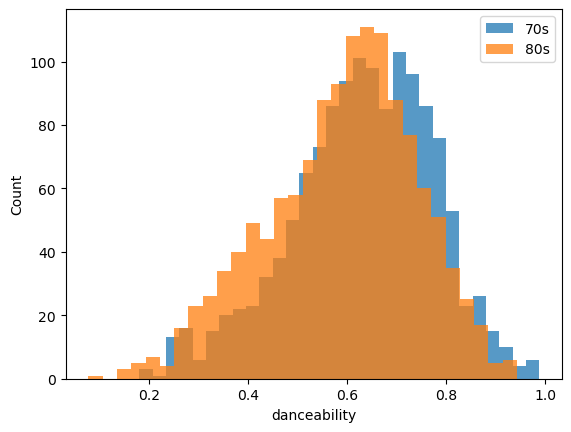

In [417]:
## multi-histogram plots to show change in mode over time

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Assuming df is your DataFrame and 'column_name' is the column you want to check
sns.histplot(dataset_eighties_features_df['danceability'], kde=False, edgecolor='None', label='70s', bins = 30)
sns.histplot(dataset_seventies_features_df['danceability'], kde=False, edgecolor='None', label='80s', bins = 30)
plt.legend()
plt.show()

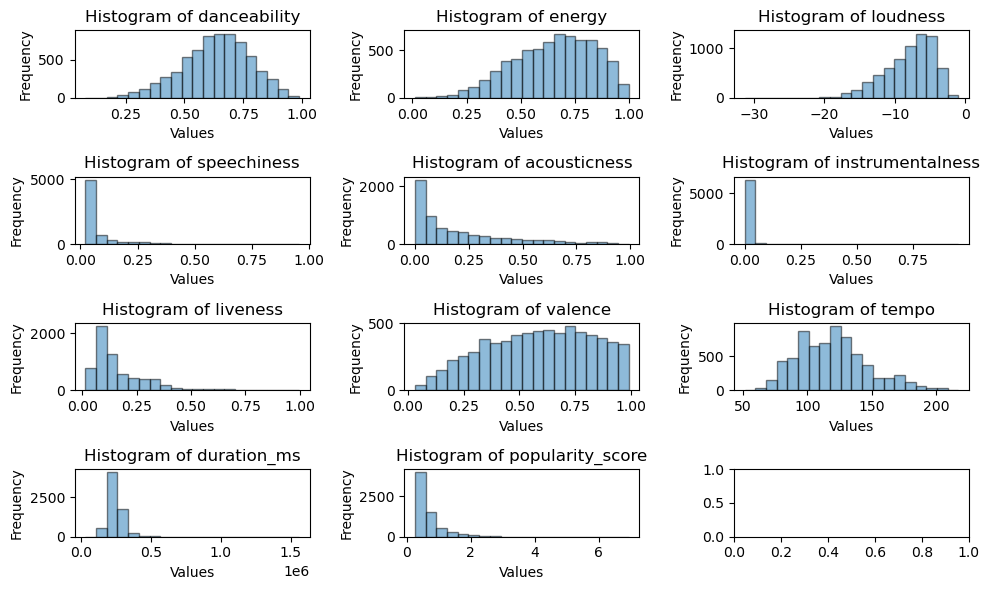

In [460]:
import matplotlib.pyplot as plt

file_path = '/Users/ryanye/Documents/Yale-NUS/DIS Copenhagen/Modules/Big Data/scraped-data.csv'

# read the file as a pandas dataframe
dataset_overall_features_df = pd.read_csv(file_path)
# Assuming df is your DataFrame
selected_columns = ['danceability', 'energy', 'loudness', 'speechiness',
                   'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 
                    'duration_ms', 'popularity_score']  # Replace with your desired column names

    
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 6))

# Flatten the axes to make it easier to iterate
axes = axes.flatten()

# Plot histogram for each column side by side
for i, column in enumerate(selected_columns):
    axes[i].hist(dataset_overall_features_df[column], bins = 20, alpha = 0.5, edgecolor = 'black')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Frequency')
    
plt.tight_layout()
plt.show()

In [485]:
file_path = '/Users/ryanye/Documents/Yale-NUS/DIS Copenhagen/Modules/Big Data/scraped-data.csv'

# read the file as a pandas dataframe
dataset_overall_features_df = pd.read_csv(file_path)
dataset_overall_features_df.shape

(6754, 17)

In [451]:
## Using SHAP to find feature importance

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import shap

# Dropping the duration_ms feature because it does not impact popularity of song
dataset_seventies_features_df_removed = dataset_seventies_features_df.drop(columns = ["duration_ms"])
# Coming up with feature matrix and target array
feature_matrix_seventies = dataset_seventies_features_df_removed.iloc[:, 4:15]
target_array_seventies = dataset_seventies_features_df_removed.iloc[:, 15]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(feature_matrix_seventies, target_array_seventies, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
# Explain the model's predictions using SHAP values
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)
# Summarize the effects of all the features
shap.summary_plot(shap_values, X_test, show = False)
plt.savefig('shap_summary_plot_70s.png')

TypeError: summary_legacy() got an unexpected keyword argument 'feature_order'

### Removing features from feature set
From the chart above, we observe that some features do not seem to impact SHAP value positively or negatively. Thus we will be removing **duration_ms** from the feature set.

In [383]:
features_matrix = dataset_eighties_features_df.iloc[:, 4:16]
target_array_squared = dataset_eighties_features_df.iloc[:, 16] ** 2
target_array = dataset_eighties_features_df.iloc[:, 16]

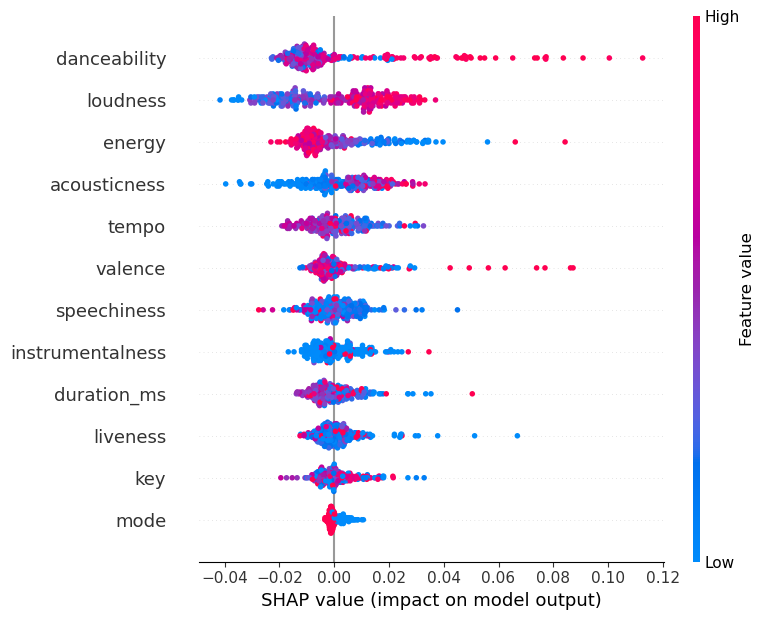

In [445]:
## Using SHAP to find feature importance

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Coming up with feature matrix and target array
feature_matrix_eighties = dataset_eighties_features_df.iloc[:, 4:16]
target_array_eighties = dataset_eighties_features_df.iloc[:, 16]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(feature_matrix_eighties, target_array_eighties, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

import shap
# Explain the model's predictions using SHAP values
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)
# Summarize the effects of all the features
shap.summary_plot(shap_values, X_test, show = False)
plt.savefig('shap_summary_plot_80s.png')

In [ ]:
## Using SHAP to find feature importance

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import shap

# Coming up with feature matrix and target array
feature_matrix_eighties = dataset_eighties_features_df.iloc[:, 4:16]
target_array_eighties = dataset_eighties_features_df.iloc[:, 16]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(feature_matrix_eighties, target_array_eighties, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
# Explain the model's predictions using SHAP values
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)
# Summarize the effects of all the features
shap.summary_plot(shap_values, X_test)
plt.savefig('shap_summary_plot_90s.png')

In [ ]:
plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")
# the columns that we are interested in
target_cols = ["acousticness","danceability","energy","speechiness","liveness","valence"]
for c in target_cols:
   # group the data by year, and plot the mean score of all music in that year
   x = df.groupby("year")[c].mean()
   ax= sns.lineplot(x=x.index,y=x,label=c)


ax.set_title('Music Attributes over the years', fontsize = 20)
ax.legend(fancybox=True, framealpha=1, shadow=True, prop={'size': 15}, loc = 'upper right')
ax.set_ylabel('Score', fontsize = 20)
#ax.set_xlabel('Year', fontsize = 20)


In [483]:
# Using random forest regressor to find the popularity score of a song trending now

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import shap

file_path = '/Users/ryanye/Documents/Yale-NUS/DIS Copenhagen/Modules/Big Data/2011-2020_scraped.csv'

# read the file as a pandas dataframe
dataset_tens_features_df = pd.read_csv(file_path)
dataset_tens_features_df_removed = dataset_tens_features_df.drop(columns = ["duration_ms"])
# Coming up with feature matrix and target array
feature_matrix_tens = dataset_tens_features_df_removed.iloc[:, 4:15]
target_array_tens = dataset_tens_features_df_removed.iloc[:, 15]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(feature_matrix_tens, target_array_tens, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

test_song_features = {}
test_song_features['danceability'] = np.array([])
test_song_features['energy'] = np.array([])
test_song_features['key'] = np.array([])
test_song_features['loudness'] = np.array([])
test_song_features['mode'] = np.array([])
test_song_features['speechiness'] = np.array([])
test_song_features['acousticness'] = np.array([])
test_song_features['instrumentalness'] = np.array([])
test_song_features['liveness'] = np.array([])
test_song_features['valence'] = np.array([])
test_song_features['tempo'] = np.array([])

song = "greedy"
artist = "Tate McRae"
song_features = get_track_features(song, artist)
# Appending danceability feature 
test_song_features['danceability'] = np.append(test_song_features['danceability'], song_features[0]['danceability'])

# Appending energy feature 
test_song_features['energy'] = np.append(test_song_features['energy'], song_features[0]['energy'])

# Appending key feature 
test_song_features['key'] = np.append(test_song_features['key'], song_features[0]['key'])

# Appending loudness feature 
test_song_features['loudness'] = np.append(test_song_features['loudness'], song_features[0]['loudness'])

# Appending mode feature 
test_song_features['mode'] = np.append(test_song_features['mode'], song_features[0]['mode'])

# Appending speechiness feature 
test_song_features['speechiness'] = np.append(test_song_features['speechiness'], song_features[0]['speechiness'])

# Appending acousticness feature 
test_song_features['acousticness'] = np.append(test_song_features['acousticness'], song_features[0]['acousticness'])

# Appending instrumentalness feature 
test_song_features['instrumentalness'] = np.append(test_song_features['instrumentalness'], song_features[0]['instrumentalness'])

# Appending liveness feature
test_song_features['liveness'] = np.append(test_song_features['liveness'], song_features[0]['liveness'])

# Appending valence feature 
test_song_features['valence'] = np.append(test_song_features['valence'], song_features[0]['valence'])

# Appending tempo feature 
test_song_features['tempo'] = np.append(test_song_features['tempo'], song_features[0]['tempo'])

test_song_df = pd.DataFrame(test_song_features) 

pred_song_pop = rf_model.predict(test_song_df.iloc[:,:])
pred_song_pop

print(f"The predicted popularity for {song} by {artist} is {pred_song_pop}")

The predicted popularity for greedy by Tate McRae is [1.59613747]


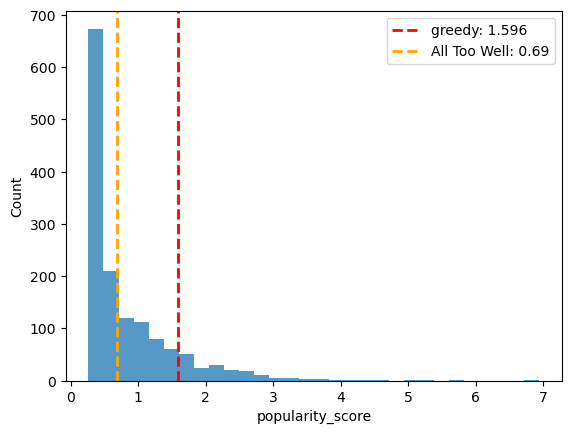

In [482]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

file_path = '/Users/ryanye/Documents/Yale-NUS/DIS Copenhagen/Modules/Big Data/2011-2020_scraped.csv'

# read the file as a pandas dataframe
dataset_tens_features_df = pd.read_csv(file_path)
dataset_tens_features_df_removed = dataset_tens_features_df.drop(columns = ["duration_ms"])
specific_value_1 = 1.596
specific_value_2 = 0.69

# Add a vertical line at the specific value
sns.histplot(dataset_tens_features_df_removed['popularity_score'], kde=False, edgecolor='None', bins = 30)
plt.axvline(specific_value_1, color='red', linestyle='dashed', linewidth=2, label=f'greedy: {specific_value_1}')
plt.axvline(specific_value_2, color='orange', linestyle='dashed', linewidth=2, label=f'All Too Well: {specific_value_2}')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")
# the columns that we are interested in
target_cols = ["acousticness","danceability","energy","speechiness","liveness","valence"]
for c in target_cols:
    # group the data by year, and plot the mean score of all music in that year
    x = df.groupby("year")[c].mean()
    ax= sns.lineplot(x=x.index,y=x,label=c)

ax.set_title('Music Attributes over the years', fontsize = 20)
ax.legend(fancybox=True, framealpha=1, shadow=True, prop={'size': 15}, loc = 'upper right')
ax.set_ylabel('Score', fontsize = 20)
#ax.set_xlabel('Year', fontsize = 20)x